# 特性関数

この回は東大の鈴木大慈先生の授業「確率数理要論」を参考にしています。参考文献:
* [講義ノート](http://ibis.t.u-tokyo.ac.jp/suzuki/lecture/2022/index.html)
* [舟木確率論](https://www.amazon.co.jp/%E7%A2%BA%E7%8E%87%E8%AB%96-%E8%AC%9B%E5%BA%A7%E6%95%B0%E5%AD%A6%E3%81%AE%E8%80%83%E3%81%88%E6%96%B9-20-%E8%88%9F%E6%9C%A8-%E7%9B%B4%E4%B9%85/dp/4254116004)


特性関数は確率論の様々なところで登場します。特性関数は特に中心極限定理の証明でとても便利であり、そのために開発されたと言っても過言ではありません。

---

**定義：特性関数**

確率変数$X$に対し、$\phi(t)=E[e^{itX}]$ を特性関数と呼ぶ。

---

特性関数には便利な性質があります。

1. $\phi$ は$k$回連続微分可能で、$\phi^{(k)}(0) = i^k E[X^k]$になります。これは微分と積分の交換で示せます。
2. 特性関数と分布関数は一対一対応します。密度関数は $f_X (x) = \frac{1}{2\pi} \int_{-\infty}^\infty \exp(-itx) \phi(t) dt$で復元されます。「特性関数が同じなら分布関数が同じ」の証明はやや大変です。やってみましょう。
3. 独立な$X_1, \dots, X_n$について、$S_n = X_1 + \dots + X_n$ の特性関数は $\phi(t) = E[\exp(itS_n)]=\prod^n_{i=1}\phi_i (t)$になります。これは独立な期待値の性質で簡単に示せます。

例えばガウス分布についてPythonで挙動を見てみましょう。ガウス分布の特性関数は次で与えられます:

* 特性関数: $\phi(t) = \exp(i t \mu - \sigma^2 t^2 / 2)$

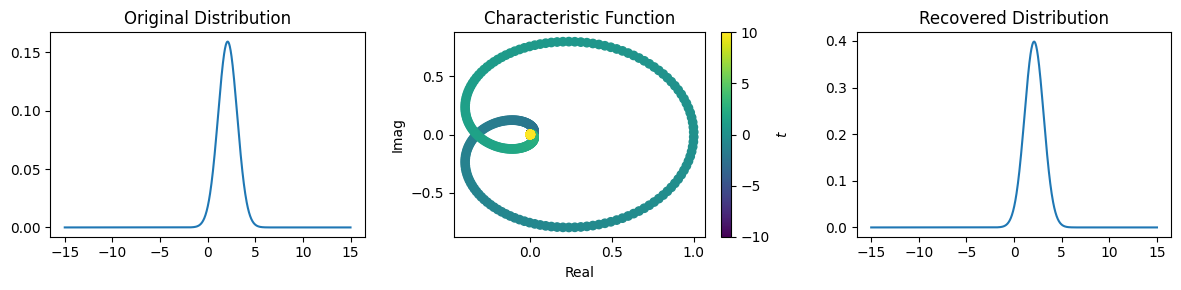

In [74]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))

# ガウス分布
x = np.linspace(-15, 15, 1000)

def normal_pdf(x, mu, sigma):
    return 1 / (2 * np.pi * sigma) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))

mu = 2.1
sigma = 1.0
plt.subplot(1, 3, 1)
plt.plot(x, normal_pdf(x, mu, sigma))
plt.title("Original Distribution")


# 特性関数の描画
num_t = 1000
t = np.linspace(-10, 10, num_t)

def normal_cf(t, mu, sigma):
    return np.exp(t * mu * 1j - (sigma * t) ** 2 / 2)

cf = normal_cf(t, mu, sigma)
plt.subplot(1, 3, 2)
plt.scatter(cf.real, cf.imag, c=t)
plt.colorbar(label=r"$t$")
plt.xlabel("Real")
plt.ylabel("Imag")
plt.title("Characteristic Function")


# 特性関数から密度関数を復元
plt.subplot(1, 3, 3)

recovered_dist = np.zeros(1000)
dt = (t.max() - t.min()) / num_t
for idx in range(len(t)):
    recovered_dist = recovered_dist + 1 / (2 * np.pi) * np.exp(-(x * t[idx]) * 1j) * cf[idx] * dt

plt.plot(x, recovered_dist.real)
plt.title("Recovered Distribution")

plt.tight_layout()

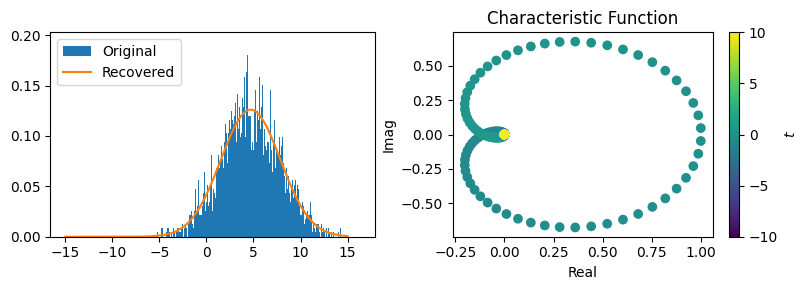

In [78]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))

# ガウス分布の和をサンプル
num_samples = 10000

mu1, sigma1 = -1.1, 1.0
mu2, sigma2 = 5.8, 3.0

X1 = np.random.randn(num_samples) * sigma1 + mu1
X2 = np.random.randn(num_samples) * sigma2 + mu2
S = X1 + X2
plt.subplot(1, 3, 1)
plt.hist(S, bins=1000, label="Original", density=True)


# 特性関数の描画
num_t = 1000
t = np.linspace(-10, 10, num_t)

def normal_cf(t, mu, sigma):
    return np.exp(t * mu * 1j - (sigma * t) ** 2 / 2)

cf = normal_cf(t, mu1, sigma1) * normal_cf(t, mu2, sigma2)
plt.subplot(1, 3, 2)
plt.scatter(cf.real, cf.imag, c=t)
plt.colorbar(label=r"$t$")
plt.xlabel("Real")
plt.ylabel("Imag")
plt.title("Characteristic Function")


# 特性関数から密度関数を復元
plt.subplot(1, 3, 1)

x = np.linspace(-15, 15, 1000)
recovered_dist = np.zeros(1000)
dt = (t.max() - t.min()) / num_t
for idx in range(len(t)):
    recovered_dist = recovered_dist + 1 / (2 * np.pi) * np.exp(-(x * t[idx]) * 1j) * cf[idx] * dt

plt.plot(x, recovered_dist.real, label="Recovered")

plt.tight_layout()
plt.legend()